In [1]:
import os
import joblib
import multiprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
                                                                                        
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
from joblib import Parallel, delayed

sns.set(style="whitegrid", color_codes=True)


In [91]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", header=None)

In [92]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       583 non-null    int64  
 1   1       583 non-null    object 
 2   2       583 non-null    float64
 3   3       583 non-null    float64
 4   4       583 non-null    int64  
 5   5       583 non-null    int64  
 6   6       583 non-null    int64  
 7   7       583 non-null    float64
 8   8       583 non-null    float64
 9   9       579 non-null    float64
 10  10      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [94]:
df.rename(columns = {0:"Age",1:"Gender",2:"TB",3:"DB",4:"Alkphos",5:"Sgpt",6:"Sgot",7:"TP",8:"ALB",9:"A/G Ratio",10:"label"}, inplace=True)

In [95]:
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [96]:
df.label.value_counts()

1    416
2    167
Name: label, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

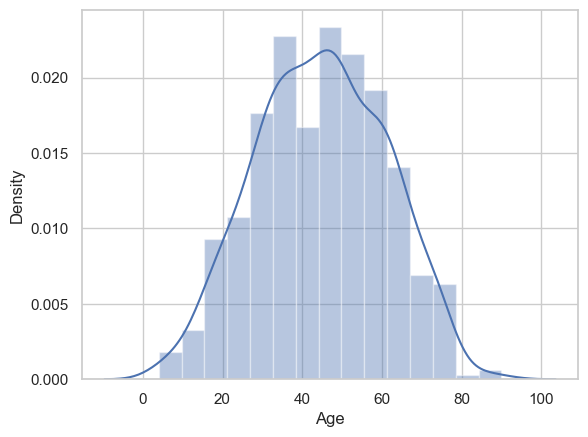

In [97]:
sns.distplot(df.Age)

In [98]:
df[df.Age <= 45].count()

Age          300
Gender       300
TB           300
DB           300
Alkphos      300
Sgpt         300
Sgot         300
TP           300
ALB          300
A/G Ratio    297
label        300
dtype: int64

In [99]:
df[df.Age >= 45].count()

Age          308
Gender       308
TB           308
DB           308
Alkphos      308
Sgpt         308
Sgot         308
TP           308
ALB          308
A/G Ratio    306
label        308
dtype: int64

In [100]:
# Total number of records
n_records = len(df.index)

# TODO: Number of records where individual's with ASD
liver_yes = len(df[df['label'] == 1])

# TODO: Number of records where individual's with no ASD
liver_no = len(df[df['label'] == 2])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(liver_yes) / n_records *100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with liver disorder: {}".format(liver_yes))
print("Individuals not diagonised with liver disorder: {}".format(liver_no))
print("Percentage of individuals diagonised with liver disorder: {:.2f}%".format(yes_percent))

Total number of records: 583
Individuals diagonised with liver disorder: 416
Individuals not diagonised with liver disorder: 167
Percentage of individuals diagonised with liver disorder: 71.36%


In [101]:
df[df['A/G Ratio'].isna() == True]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,label
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='A/G Ratio', ylabel='Density'>

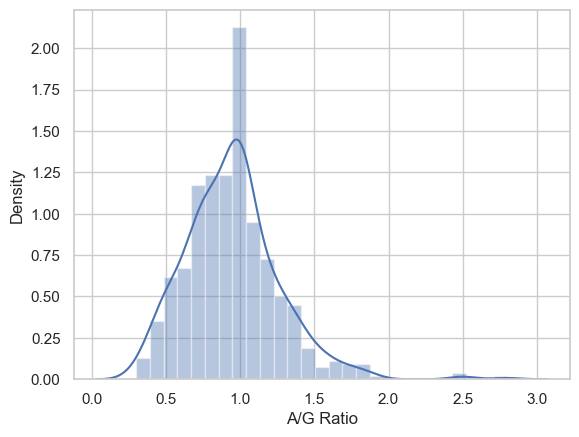

In [102]:
sns.distplot(df['A/G Ratio'])

In [103]:
df['A/G Ratio'].mean()

0.9470639032815197

In [104]:
df['A/G Ratio'].fillna(df['A/G Ratio'].mean(), inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  label      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [106]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [107]:
print(df.dtypes)

Age            int64
Gender        object
TB           float64
DB           float64
Alkphos        int64
Sgpt           int64
Sgot           int64
TP           float64
ALB          float64
A/G Ratio    float64
label          int64
dtype: object


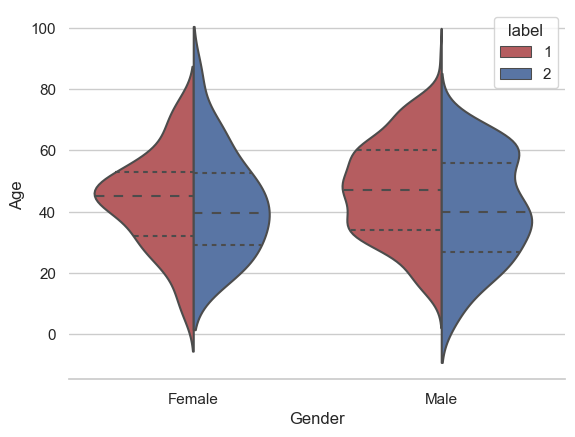

In [108]:
sns.violinplot(x="Gender", y="Age", hue="label", data=df, split=True,
                inner="quart", palette={1: "r", 2: "b"})
sns.despine(left=True)

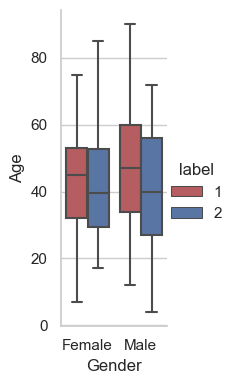

In [109]:
sns.catplot(x="Gender", y="Age", hue="label", kind="box", height=4, aspect=.5, palette={1: "r", 2: "b"}, data=df)

In [110]:
df.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

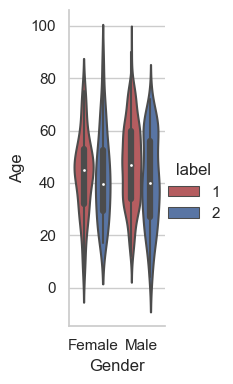

In [111]:
sns.catplot(x="Gender", y="Age", hue="label", kind="violin", height=4, aspect=.5, palette={1: "r", 2: "b"}, data=df)

In [112]:
# Split the data into features and target label
y_label = df['label']
x_features = df[["Age","Gender","TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A/G Ratio"]]

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ["Age","TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A/G Ratio"]

transformed_features = pd.DataFrame(data = x_features)
transformed_features[numerical] = scaler.fit_transform(x_features[numerical])
transformed_features
# Show an example of a record with scaling applied
display(transformed_features.head(n = 5))

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,0.709302,Female,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240
1,0.674419,Male,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176
2,0.674419,Male,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236
3,0.627907,Male,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280
4,0.790698,Male,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040


In [114]:
#One-hot encode the 'transformed_features' data using pandas.get_dummies()
features = pd.get_dummies(transformed_features)
display(features.head(5))

# Encode the 'all_classes_raw' data to numerical values
labels = y_label.apply(lambda x: 1 if x == 1 else 0)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Gender_Female,Gender_Male
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1,0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0,1
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0,1


11 total features after one-hot encoding.
['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio', 'Gender_Female', 'Gender_Male']


In [115]:
features

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Gender_Female,Gender_Male
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1,0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0,1
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,0,1
579,0.418605,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,0,1
580,0.558140,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,0,1
581,0.313953,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,0,1


In [116]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: label, Length: 583, dtype: int64

Text(0, 0.5, 'Frequency')

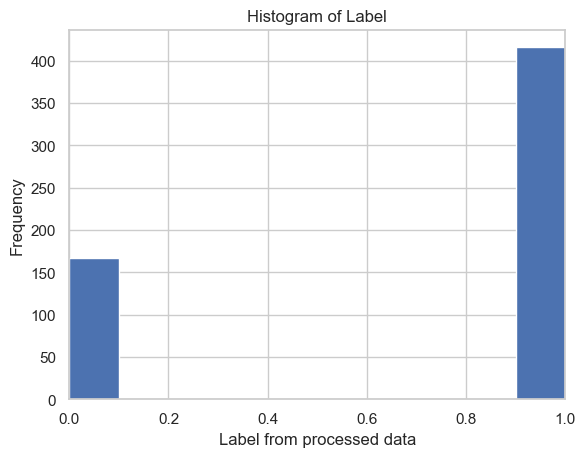

In [117]:
# 8 bins
plt.hist(labels, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Label')
plt.xlabel('Label from processed data')
plt.ylabel('Frequency')


In [118]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 466 samples.
Testing set has 117 samples.


# Build Models

In [ ]:
# Logistic Regression

In [121]:
logistic_regression = LogisticRegression()

lr_cross_val_scores = cross_val_score(logistic_regression, features, labels, cv=10)
print("logistic regression cross_val_scores: ", lr_cross_val_scores.mean())

lr_cross_val_scores_roc = cross_val_score(logistic_regression, features, labels, cv=10, scoring='roc_auc').mean()
print("logistic regression AUC Score: ", lr_cross_val_scores_roc.mean())

logistic_regression.fit(X_train, y_train)
predictions_test = logistic_regression.predict(X_test)
print("logistic regression fbeta Score: ", fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

logistic regression cross_val_scores:  0.7169783752191701
logistic regression AUC Score:  0.726246199699392
logistic regression fbeta Score:  0.7550644567219152


In [120]:
# SVM

In [124]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)
svm_cross_val_scores = cross_val_score(svc, features_final, labels, cv=10)
print("svm cross_val_scores: ", svm_cross_val_scores.mean())

svm_cross_val_scores_roc = cross_val_score(svc, features, labels, cv=10, scoring='roc_auc').mean()
print("svm AUC Score: ", svm_cross_val_scores_roc.mean())

svc.fit(X_train, y_train)
predictions_test = svc.predict(X_test)
print("svm fbeta Score: ", fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

svm cross_val_scores:  0.7135593220338983
svm AUC Score:  0.7058311129329781
svm fbeta Score:  0.7531760435571688


In [125]:
# KNN

In [132]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_cross_val_scores = cross_val_score(knn, features, labels, cv=10)
print("knn cross_val_scores: ", knn_cross_val_scores.mean())

knn_cross_val_scores_roc = cross_val_score(knn, features, labels, cv=10, scoring='roc_auc')
print("knn AUC Score: ", knn_cross_val_scores_roc.mean())

knn.fit(X_train, y_train)
predictions_test = knn.predict(X_test)
print("knn fbeta Score: ", fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

n_neighbors_range = range(10, 50)

def evaluate_knn(n, features, labels):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features, labels, cv=10)
    return n, cv_scores.mean()

results = Parallel(n_jobs=-1)(delayed(evaluate_knn)(n, features, labels) for n in n_neighbors_range)

for n, mean_score in results:
    print(n, mean_score)


knn cross_val_scores:  0.6415838690824079
knn AUC Score:  0.6440179425428708
knn fbeta Score:  0.7446808510638298
10 0.6415838690824079
11 0.6535067212156633
12 0.6380771478667446
13 0.6654003506721217
14 0.6604032729398013
15 0.6774400935125657
16 0.6705143191116306
17 0.6757159555815313
18 0.663793103448276
19 0.6912624196376388
20 0.6930157802454705
21 0.6997954412624197
22 0.6878725891291643
23 0.699853886616014
24 0.701490356516657
25 0.6979836353009936
26 0.7047925189947399
27 0.7031852717708943
28 0.7032144944476915
29 0.6930157802454705
30 0.6896259497369959
31 0.6964348334307422
32 0.7049094097019288
33 0.7015195791934541
34 0.6946522501461134
35 0.6946522501461134
36 0.696405610753945
37 0.7067504383401519
38 0.7067796610169491
39 0.7067504383401519
40 0.717095265926359
41 0.7066919929865576
42 0.7153419053185271
43 0.708416130917592
44 0.71531268264173
45 0.7135593220338983
46 0.7170075978959674
47 0.7118644067796611
48 0.7170368205727645
49 0.7101402688486266


In [133]:

# Get the number of CPUs using os.cpu_count()
cpu_count = os.cpu_count()

# Alternatively, you can use multiprocessing.cpu_count()
# cpu_count = multiprocessing.cpu_count()

print(f"Number of CPUs: {cpu_count}")


Number of CPUs: 8


In [143]:
# Naive Bayes

In [142]:
nb = MultinomialNB()
naive_bayes_cross_val_scores = cross_val_score(nb, features,labels, cv=10)
print("naive bayes cross_val_scores: ", naive_bayes_cross_val_scores.mean())

naive_bayes_cross_val_scores_roc = cross_val_score(nb, features,labels, cv=10, scoring='roc_auc')
print("naive bayes AUC Score: ", naive_bayes_cross_val_scores_roc.mean())

nb.fit(X_train, y_train)
predictions_test = nb.predict(X_test)
print("naive bayes fbeta Score: ", fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

naive bayes cross_val_scores:  0.7135593220338983
naive bayes AUC Score:  0.7159619030539044
naive bayes fbeta Score:  0.7531760435571688
